In [6]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.join(os.path.dirname(os.getcwd()), '')
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [4]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=4,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1

Grid search bert-base-uncased, learning rate 1e-05


Map:   0%|          | 0/1796 [00:00<?, ? examples/s]

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.3832	Val Loss:	2.1719	Accuracy:	0.3085	F1:	0.1922
2 / 30: Train Loss:	2.0180	Val Loss:	1.8765	Accuracy:	0.4595	F1:	0.3400
3 / 30: Train Loss:	1.7100	Val Loss:	1.6588	Accuracy:	0.5120	F1:	0.3952
4 / 30: Train Loss:	1.4370	Val Loss:	1.5441	Accuracy:	0.5274	F1:	0.4105
5 / 30: Train Loss:	1.2086	Val Loss:	1.4097	Accuracy:	0.5711	F1:	0.4458
6 / 30: Train Loss:	1.0017	Val Loss:	1.3342	Accuracy:	0.5799	F1:	0.4668
7 / 30: Train Loss:	0.8259	Val Loss:	1.2576	Accuracy:	0.5908	F1:	0.4912
8 / 30: Train Loss:	0.6725	Val Loss:	1.2198	Accuracy:	0.6127	F1:	0.5198
9 / 30: Train Loss:	0.5696	Val Loss:	1.2678	Accuracy:	0.6039	F1:	0.5386
10 / 30: Train Loss:	0.4843	Val Loss:	1.2046	Accuracy:	0.6433	F1:	0.5605
11 / 30: Train Loss:	0.3960	Val Loss:	1.1596	Accuracy:	0.6433	F1:	0.5861
12 / 30: Train Loss:	0.3174	Val Loss:	1.1692	Accuracy:	0.6499	F1:	0.5996
13 / 30: Train Loss:	0.2393	Val Loss:	1.1693	Accuracy:	0.6389	F1:	0.6128
14 / 30: Train Loss:	0.1929	Val Loss:	1.1838	Accuracy:	0.652

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.0105	Val Loss:	1.5189	Accuracy:	0.5383	F1:	0.4196
2 / 30: Train Loss:	1.2010	Val Loss:	1.2669	Accuracy:	0.6214	F1:	0.5678
3 / 30: Train Loss:	0.7145	Val Loss:	1.3361	Accuracy:	0.5930	F1:	0.5501
4 / 30: Train Loss:	0.4320	Val Loss:	1.2179	Accuracy:	0.6630	F1:	0.6318
5 / 30: Train Loss:	0.2400	Val Loss:	1.3560	Accuracy:	0.6258	F1:	0.6037
6 / 30: Train Loss:	0.1319	Val Loss:	1.2592	Accuracy:	0.6783	F1:	0.6560
7 / 30: Train Loss:	0.0691	Val Loss:	1.3567	Accuracy:	0.6521	F1:	0.6371
8 / 30: Train Loss:	0.0523	Val Loss:	1.3523	Accuracy:	0.6652	F1:	0.6523
9 / 30: Train Loss:	0.0464	Val Loss:	1.4452	Accuracy:	0.6630	F1:	0.6378
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.75      0.66      0.70        67
               anecdote       0.90      0.81      0.85        43
         cherry picking       0.63      0.70      0.66        56
   

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.8725	Val Loss:	1.4827	Accuracy:	0.5295	F1:	0.3956
2 / 30: Train Loss:	1.0693	Val Loss:	1.4060	Accuracy:	0.5602	F1:	0.5157
3 / 30: Train Loss:	0.6200	Val Loss:	1.3038	Accuracy:	0.5996	F1:	0.5566
4 / 30: Train Loss:	0.3681	Val Loss:	1.3342	Accuracy:	0.6324	F1:	0.6123
5 / 30: Train Loss:	0.2790	Val Loss:	1.3085	Accuracy:	0.6586	F1:	0.6336
6 / 30: Train Loss:	0.1184	Val Loss:	1.4924	Accuracy:	0.6499	F1:	0.6194
7 / 30: Train Loss:	0.0868	Val Loss:	1.6107	Accuracy:	0.6127	F1:	0.5931
8 / 30: Train Loss:	0.0710	Val Loss:	1.8240	Accuracy:	0.6302	F1:	0.6159
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.67      0.70      0.69        67
               anecdote       0.91      0.74      0.82        43
         cherry picking       0.70      0.62      0.66        56
      conspiracy theory       0.72      0.85      0.78        39
          

In [14]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}


gamma = [2,4,8,16]
lr = 5.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=4,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 5e-05, focal loss gamma 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	21.0349	Val Loss:	1.7314	Accuracy:	0.4858	F1:	0.4319
2 / 30: Train Loss:	12.3919	Val Loss:	1.5668	Accuracy:	0.4902	F1:	0.4814
3 / 30: Train Loss:	6.3255	Val Loss:	1.4705	Accuracy:	0.5077	F1:	0.4899
4 / 30: Train Loss:	3.0284	Val Loss:	1.2469	Accuracy:	0.5799	F1:	0.5529
5 / 30: Train Loss:	1.6705	Val Loss:	1.1086	Accuracy:	0.6521	F1:	0.6390
6 / 30: Train Loss:	0.6796	Val Loss:	1.1423	Accuracy:	0.6346	F1:	0.6094
7 / 30: Train Loss:	0.2094	Val Loss:	1.1428	Accuracy:	0.6324	F1:	0.6233
8 / 30: Train Loss:	0.1516	Val Loss:	1.1008	Accuracy:	0.6455	F1:	0.6220
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.75      0.54      0.63        67
               anecdote       0.80      0.86      0.83        43
         cherry picking       0.70      0.75      0.72        56
      conspiracy theory       0.65      0.87      0.75        39
        

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	17.0608	Val Loss:	1.7743	Accuracy:	0.4836	F1:	0.4374
2 / 30: Train Loss:	9.1730	Val Loss:	1.7675	Accuracy:	0.4464	F1:	0.4489
3 / 30: Train Loss:	4.6589	Val Loss:	1.5562	Accuracy:	0.4792	F1:	0.4659
4 / 30: Train Loss:	2.4391	Val Loss:	1.2342	Accuracy:	0.6083	F1:	0.5893
5 / 30: Train Loss:	1.0332	Val Loss:	1.1739	Accuracy:	0.6258	F1:	0.6175
6 / 30: Train Loss:	0.3749	Val Loss:	1.1370	Accuracy:	0.6324	F1:	0.6195
7 / 30: Train Loss:	0.1584	Val Loss:	1.0879	Accuracy:	0.6521	F1:	0.6365
8 / 30: Train Loss:	0.0595	Val Loss:	1.0770	Accuracy:	0.6411	F1:	0.6239
9 / 30: Train Loss:	0.0270	Val Loss:	1.0735	Accuracy:	0.6608	F1:	0.6443
10 / 30: Train Loss:	0.0196	Val Loss:	1.0678	Accuracy:	0.6521	F1:	0.6344
11 / 30: Train Loss:	0.0119	Val Loss:	1.0700	Accuracy:	0.6521	F1:	0.6379
12 / 30: Train Loss:	0.0100	Val Loss:	1.0655	Accuracy:	0.6499	F1:	0.6341
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	11.5498	Val Loss:	1.8827	Accuracy:	0.4442	F1:	0.4124
2 / 30: Train Loss:	5.5442	Val Loss:	1.7268	Accuracy:	0.5142	F1:	0.5106
3 / 30: Train Loss:	2.2779	Val Loss:	1.5715	Accuracy:	0.4748	F1:	0.4725
4 / 30: Train Loss:	0.8238	Val Loss:	1.2676	Accuracy:	0.6411	F1:	0.6201
5 / 30: Train Loss:	0.2229	Val Loss:	1.2617	Accuracy:	0.6127	F1:	0.6064
6 / 30: Train Loss:	0.0945	Val Loss:	1.2091	Accuracy:	0.6280	F1:	0.6107
7 / 30: Train Loss:	0.0585	Val Loss:	1.2114	Accuracy:	0.6433	F1:	0.6077
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.71      0.63      0.67        67
               anecdote       0.92      0.81      0.86        43
         cherry picking       0.67      0.50      0.57        56
      conspiracy theory       0.70      0.85      0.77        39
           fake experts       0.67      0.83      0.74        12
           false

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	5.5146	Val Loss:	1.9887	Accuracy:	0.4333	F1:	0.4029
2 / 30: Train Loss:	2.1653	Val Loss:	1.8159	Accuracy:	0.5011	F1:	0.4922
3 / 30: Train Loss:	0.7440	Val Loss:	1.6126	Accuracy:	0.5624	F1:	0.5342
4 / 30: Train Loss:	0.2333	Val Loss:	1.4686	Accuracy:	0.5974	F1:	0.5965
5 / 30: Train Loss:	0.0564	Val Loss:	1.4089	Accuracy:	0.6258	F1:	0.6175
6 / 30: Train Loss:	0.0277	Val Loss:	1.3846	Accuracy:	0.6171	F1:	0.6093
7 / 30: Train Loss:	0.0162	Val Loss:	1.3545	Accuracy:	0.6346	F1:	0.6162
8 / 30: Train Loss:	0.0087	Val Loss:	1.3341	Accuracy:	0.6411	F1:	0.6206
9 / 30: Train Loss:	0.0067	Val Loss:	1.3213	Accuracy:	0.6389	F1:	0.6237
10 / 30: Train Loss:	0.0052	Val Loss:	1.3101	Accuracy:	0.6433	F1:	0.6243
11 / 30: Train Loss:	0.0044	Val Loss:	1.3072	Accuracy:	0.6433	F1:	0.6247
12 / 30: Train Loss:	0.0033	Val Loss:	1.2991	Accuracy:	0.6346	F1:	0.6155
13 / 30: Train Loss:	0.0024	Val Loss:	1.3000	Accuracy:	0.6346	F1:	0.6185
14 / 30: Train Loss:	0.0022	Val Loss:	1.2892	Accuracy:	0.643

In [15]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'wd':[]}


g = 16
lr = 5.0e-5
weight_decay = [0.1, 0.01]

for wd in weight_decay:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}, weight decay {wd}')
    data = ClimateDataset(model_to_train=4,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=wd,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 5e-05, focal loss gamma 16, weight decay 0.1


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	5.5162	Val Loss:	1.9859	Accuracy:	0.4420	F1:	0.4096
2 / 30: Train Loss:	2.2110	Val Loss:	1.8331	Accuracy:	0.4945	F1:	0.4819
3 / 30: Train Loss:	0.7574	Val Loss:	1.5830	Accuracy:	0.5842	F1:	0.5557
4 / 30: Train Loss:	0.2188	Val Loss:	1.4659	Accuracy:	0.6171	F1:	0.6088
5 / 30: Train Loss:	0.0580	Val Loss:	1.4142	Accuracy:	0.6324	F1:	0.6165
6 / 30: Train Loss:	0.0290	Val Loss:	1.3717	Accuracy:	0.6368	F1:	0.6295
7 / 30: Train Loss:	0.0152	Val Loss:	1.3583	Accuracy:	0.6433	F1:	0.6230
8 / 30: Train Loss:	0.0093	Val Loss:	1.3364	Accuracy:	0.6389	F1:	0.6199
9 / 30: Train Loss:	0.0068	Val Loss:	1.3213	Accuracy:	0.6477	F1:	0.6271
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.70      0.63      0.66        67
               anecdote       0.84      0.74      0.79        43
         cherry picking       0.62      0.59      0.61        56
   

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	5.5154	Val Loss:	1.9871	Accuracy:	0.4311	F1:	0.4006
2 / 30: Train Loss:	2.2374	Val Loss:	1.8502	Accuracy:	0.4923	F1:	0.4867
3 / 30: Train Loss:	0.7953	Val Loss:	1.5870	Accuracy:	0.5821	F1:	0.5524
4 / 30: Train Loss:	0.2343	Val Loss:	1.4659	Accuracy:	0.6149	F1:	0.6024
5 / 30: Train Loss:	0.0575	Val Loss:	1.4176	Accuracy:	0.6258	F1:	0.6179
6 / 30: Train Loss:	0.0304	Val Loss:	1.3705	Accuracy:	0.6324	F1:	0.6234
7 / 30: Train Loss:	0.0159	Val Loss:	1.3556	Accuracy:	0.6433	F1:	0.6224
8 / 30: Train Loss:	0.0091	Val Loss:	1.3350	Accuracy:	0.6302	F1:	0.6095
9 / 30: Train Loss:	0.0071	Val Loss:	1.3228	Accuracy:	0.6477	F1:	0.6282
10 / 30: Train Loss:	0.0051	Val Loss:	1.3114	Accuracy:	0.6433	F1:	0.6219
11 / 30: Train Loss:	0.0036	Val Loss:	1.3097	Accuracy:	0.6433	F1:	0.6289
12 / 30: Train Loss:	0.0029	Val Loss:	1.2994	Accuracy:	0.6433	F1:	0.6272
13 / 30: Train Loss:	0.0026	Val Loss:	1.3009	Accuracy:	0.6302	F1:	0.6173
14 / 30: Train Loss:	0.0023	Val Loss:	1.2902	Accuracy:	0.649

In [16]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}



g = 16
lr = 5.0e-5
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=4,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 5e-05 focal loss, gamma: 16 wd: 0.0, Lora alpha 8, rank 8


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.8129	Val Loss:	2.4671	Accuracy:	0.0985	F1:	0.0793
2 / 30: Train Loss:	7.4010	Val Loss:	2.4577	Accuracy:	0.1007	F1:	0.0791
3 / 30: Train Loss:	7.1804	Val Loss:	2.4331	Accuracy:	0.1641	F1:	0.1412
4 / 30: Train Loss:	6.8637	Val Loss:	2.4025	Accuracy:	0.1904	F1:	0.1585
5 / 30: Train Loss:	6.3559	Val Loss:	2.3599	Accuracy:	0.2254	F1:	0.1994
6 / 30: Train Loss:	5.9266	Val Loss:	2.3037	Accuracy:	0.2429	F1:	0.2230
7 / 30: Train Loss:	5.2552	Val Loss:	2.2462	Accuracy:	0.2954	F1:	0.2613
8 / 30: Train Loss:	4.9202	Val Loss:	2.2002	Accuracy:	0.3107	F1:	0.2770
9 / 30: Train Loss:	4.5409	Val Loss:	2.1524	Accuracy:	0.3392	F1:	0.3044
10 / 30: Train Loss:	4.3310	Val Loss:	2.1100	Accuracy:	0.3589	F1:	0.3223
11 / 30: Train Loss:	3.9302	Val Loss:	2.0671	Accuracy:	0.3807	F1:	0.3404
12 / 30: Train Loss:	3.7723	Val Loss:	2.0359	Accuracy:	0.3873	F1:	0.3442
13 / 30: Train Loss:	3.6945	Val Loss:	2.0123	Accuracy:	0.3786	F1:	0.3497
14 / 30: Train Loss:	3.5166	Val Loss:	1.9866	Accuracy:	0.391

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.8016	Val Loss:	2.4652	Accuracy:	0.0985	F1:	0.0800
2 / 30: Train Loss:	7.3448	Val Loss:	2.4494	Accuracy:	0.1313	F1:	0.1045
3 / 30: Train Loss:	7.0188	Val Loss:	2.4161	Accuracy:	0.1794	F1:	0.1448
4 / 30: Train Loss:	6.4913	Val Loss:	2.3679	Accuracy:	0.2166	F1:	0.1843
5 / 30: Train Loss:	5.7988	Val Loss:	2.2996	Accuracy:	0.2429	F1:	0.2072
6 / 30: Train Loss:	5.3113	Val Loss:	2.2332	Accuracy:	0.2845	F1:	0.2494
7 / 30: Train Loss:	4.7664	Val Loss:	2.1816	Accuracy:	0.3326	F1:	0.2950
8 / 30: Train Loss:	4.4476	Val Loss:	2.1438	Accuracy:	0.3326	F1:	0.2991
9 / 30: Train Loss:	4.1413	Val Loss:	2.0998	Accuracy:	0.3348	F1:	0.3075
10 / 30: Train Loss:	3.9594	Val Loss:	2.0528	Accuracy:	0.3479	F1:	0.3232
11 / 30: Train Loss:	3.5700	Val Loss:	2.0133	Accuracy:	0.3720	F1:	0.3368
12 / 30: Train Loss:	3.4435	Val Loss:	1.9865	Accuracy:	0.3807	F1:	0.3554
13 / 30: Train Loss:	3.3242	Val Loss:	1.9620	Accuracy:	0.3742	F1:	0.3535
14 / 30: Train Loss:	3.1650	Val Loss:	1.9398	Accuracy:	0.385

In [17]:
lr = 5.0e-5
wd=0.0
g = 16

data = ClimateDataset(model_to_train=4,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                    wd=wd,
                                                    train_dataloader=data.train_dataloader,
                                                    eval_dataloader=data.eval_dataloader,
                                                    test_dataloader=data.test_dataloader,
                                                    focalloss=True,
                                                    gamma=g,
                                                    early_stop=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	5.5146	Val Loss:	1.9887	Accuracy:	0.4333	F1:	0.4029
2 / 30: Train Loss:	2.1653	Val Loss:	1.8159	Accuracy:	0.5011	F1:	0.4922
3 / 30: Train Loss:	0.7440	Val Loss:	1.6126	Accuracy:	0.5624	F1:	0.5342
4 / 30: Train Loss:	0.2333	Val Loss:	1.4686	Accuracy:	0.5974	F1:	0.5965
5 / 30: Train Loss:	0.0564	Val Loss:	1.4089	Accuracy:	0.6258	F1:	0.6175
6 / 30: Train Loss:	0.0277	Val Loss:	1.3846	Accuracy:	0.6171	F1:	0.6093
7 / 30: Train Loss:	0.0162	Val Loss:	1.3545	Accuracy:	0.6346	F1:	0.6162
8 / 30: Train Loss:	0.0087	Val Loss:	1.3341	Accuracy:	0.6411	F1:	0.6206
9 / 30: Train Loss:	0.0067	Val Loss:	1.3213	Accuracy:	0.6389	F1:	0.6237
10 / 30: Train Loss:	0.0052	Val Loss:	1.3101	Accuracy:	0.6433	F1:	0.6243
11 / 30: Train Loss:	0.0044	Val Loss:	1.3072	Accuracy:	0.6433	F1:	0.6247
12 / 30: Train Loss:	0.0033	Val Loss:	1.2991	Accuracy:	0.6346	F1:	0.6155
13 / 30: Train Loss:	0.0024	Val Loss:	1.3000	Accuracy:	0.6346	F1:	0.6185
14 / 30: Train Loss:	0.0022	Val Loss:	1.2892	Accuracy:	0.643

In [19]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

_, y_true, y_pred = trainer.evaluate(dataloader=data.test_dataloader, eval_on_best_model=True, is_quantized=False)

# print classification report:
print(classification_report(y_true=y_true, y_pred=y_pred,target_names=trainer.labels ,zero_division=0.0))

                         precision    recall  f1-score   support

             ad hominem       0.71      0.86      0.78        37
               anecdote       0.88      0.88      0.88        24
         cherry picking       0.59      0.61      0.60        31
      conspiracy theory       0.85      0.50      0.63        22
           fake experts       1.00      0.86      0.92         7
           false choice       0.33      0.43      0.38         7
      false equivalence       0.75      0.38      0.50         8
impossible expectations       0.62      0.71      0.67        21
      misrepresentation       0.65      0.77      0.71        22
     oversimplification       0.78      0.70      0.74        20
           single cause       0.67      0.69      0.68        32
     slothful induction       0.27      0.24      0.26        25

               accuracy                           0.66       256
              macro avg       0.68      0.64      0.64       256
           weighted avg

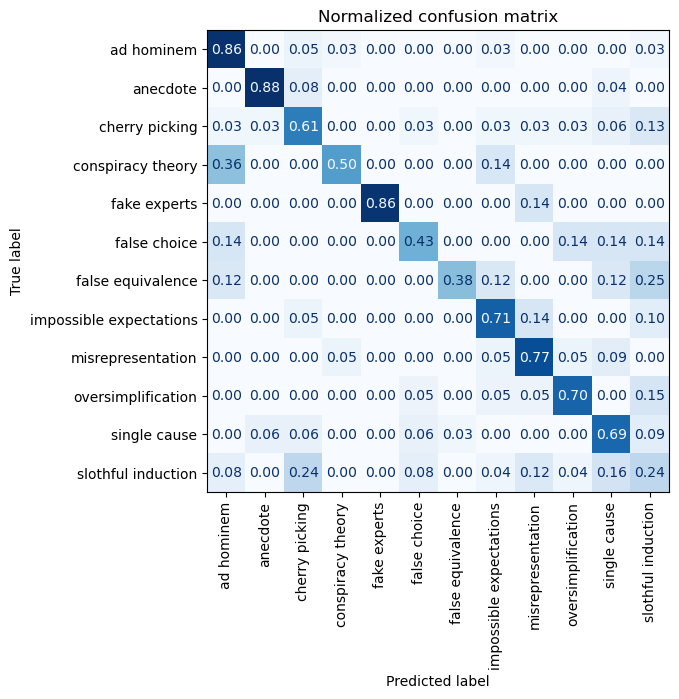

In [20]:
#plot confusion matrix:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred, normalize='true')
_, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trainer.labels)
disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False, xticks_rotation='vertical')
plt.title("Normalized confusion matrix")
plt.show()